# Using Exotic Map Projections: `use_crs="provided"`

Value "provided" tells Lets-Plot that the input GeoDataframe already contains coordinates in the desired CRS and should not be reprojected any further.

This is a workaround for the case when the desired CRS is not naturally supported by Lets-Plot.

For example, if you try to use the **Robinson** projection (EPSG:54030): `use_crs="EPSG:54030"`, then Lets-Plot will return an error: 
> CRSError: Invalid projection: EPSG:54030: (Internal Proj Error: proj_create: crs not found)

Let's see how can we still plot a map in the **Robinsons** projection in Lets-Plot.

In [1]:
from lets_plot import *
from lets_plot.geo_data import *

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



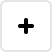
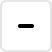
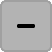
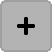
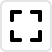
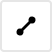
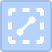
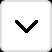
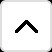
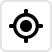
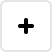
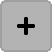
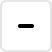
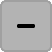
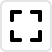
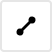
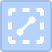
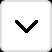
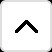
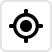

In [2]:
LetsPlot.setup_html()

#### 1. Default Presentation

In [3]:
world = geocode_countries().inc_res().get_boundaries()

ggplot() + geom_map(map=world)

#### 2. Project "World"  to the Robinson's

In [4]:
from cartopy import crs as ccrs

# Define the CartoPy CRS object.
crs = ccrs.Robinson()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
world_robinson = world.to_crs(crs_proj4)

ggplot() + geom_map(map=world_robinson, use_crs="provided")

#### 3. Options

In [5]:
(ggplot() + 
 geom_polygon(map=world_robinson, use_crs="provided", color="white") + 
 theme_void() + theme(plot_title=element_text(face="bold-italic")) + flavor_solarized_light() + 
 ggsize(2048, 1096) + 
 coord_cartesian(xlim=[-13E6, None]) + 
 ggtitle("World in the Robinson Projection")
)